# HW2 Neural Network 

## Overview

In this homework, you will get introduced to [PyTorch](https://pytorch.org), a framework for building and training neural networks. PyTorch in a lot of ways behaves like the arrays you love from Numpy. These Numpy arrays, after all, are just tensors. PyTorch takes these tensors and makes it simple to move them to GPUs for the faster processing needed when training neural networks. It also provides a module that automatically calculates gradients (for backpropagation) and another module specifically for building neural networks.

More specifically, you will first learn some PyTorch basics. And then, you will train a simple neural network on **Heart Failure Prediction** (same as HW1 but with neural network).

---

In [ ]:
import os
import sys

DATA_PATH = "../HW2_NN-lib/data/"

sys.path.append('../HW2_NN-lib')

---

## 1 PyTorch Basics [30 points]

It turns out neural network computations are just a bunch of linear algebra operations on tensors, a generalization of matrices. A vector is a 1-dimensional tensor, a matrix is a 2-dimensional tensor, an array with three indices is a 3-dimensional tensor (RGB color images for example). The fundamental data structure for neural networks are tensors and PyTorch (as well as pretty much every other deep learning framework) is built around tensors.

With the basics covered, it is time to explore how we can use PyTorch to build a simple neural network.

In [ ]:
import random
import numpy as np
import torch
import torch.nn as nn

In [ ]:
# set seed
seed = 24
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
os.environ["PYTHONHASHSEED"] = str(seed)

### 1.1 ReLU Implementation from scratch [7 points]

CLASS: torch.nn.ReLU(inplace=False)
Applies the **rectified linear unit** function element-wise:

\begin{equation}
\operatorname{ReLU}(x)=(x)^{+}=\max (0, x)
\end{equation}

As usual with py.torch, the function is an instace of the function's class.

Note re Latex in Jupyter
Inline expressions can be added by surrounding the latex code with \$.  

Expressions on their own line are surrounded by \\begin{equation} and \\end{equation}  

In [ ]:
#input
# x: torch.Tensor
#output
# relu(x): torch.Tensor
def relu(x):

    """ 
    TODO: Implement a ReLU activation function from **scratch**.
    
    REFERENCE: https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU
    """
    
    # Exercise 1/10
    # CODE
    y = torch.max(torch.zeros_like(x), x) #output must have the same shape
    return y

    # END


In [ ]:
'''
AUTOGRADER CELL. DO NOT MODIFY THIS.
'''

# test if `activation` directly calls `torch.relu`
random_tensor = torch.randn((2, 2))
_relu = torch.relu
del torch.relu
try:
    relu(random_tensor)
    torch.relu = _relu
except:
    print("`relu` not implemented from scratch!")
    torch.relu = _relu
    raise

# test on some random input
random_tensor = torch.randn((1, 1))[0][0]
assert torch.allclose(relu(random_tensor), torch.relu(random_tensor)), "relu() is wrong for {}!".format(random_tensor)
random_tensor = torch.randn((1, 1))[0][0]
assert torch.allclose(relu(random_tensor), torch.relu(random_tensor)), "relu() is wrong for {}!".format(random_tensor)
random_tensor = torch.randn((2, 2))
assert torch.allclose(relu(random_tensor), torch.relu(random_tensor)), "relu() is wrong!"

In [ ]:
'''
AUTOGRADER CELL. DO NOT MODIFY THIS.
'''



### 1.2 Sigmoid Implementation from scratch [7 points]

\begin{equation}
\sigma(x)=\frac{1}{1+e^{-x}}  
\end{equation}
\begin{equation}
\sigma(-x) = 1 - \sigma(-x)
\end{equation}
- Domain: (-∞, +∞)
- Range: (0, +1)
- σ(0) = 0.5
- The function is monotonically increasing.
- The function is continuous everywhere.
- The function is differentiable everywhere in its domain.
- For values less than -10, the function’s value is almost zero. For values greater than 10, the function’s values are almost one.

In [ ]:
#input
# x: torch.Tensor
#output
# sigmoid(x): torch.Tensor
def sigmoid(x):

    """ 
    TODO: Implement a a from **scratch**.
    HINT: Consider `torch.exp()`.
    """
    
   # Exercise 2/10

    # CODE
    
    return 1/(1+torch.exp(-x))

    # END    

In [ ]:
'''
AUTOGRADER CELL. DO NOT MODIFY THIS.
'''

# test if `activation` directly calls `torch.sigmoid`
random_tensor = torch.randn((2, 2))
_sigmoid = torch.sigmoid
del torch.sigmoid
try:
    sigmoid(random_tensor)
    torch.sigmoid = _sigmoid
except:
    print("`activation` not implemented from scratch!")
    torch.sigmoid = _sigmoid
    raise

In [ ]:
'''
AUTOGRADER CELL. DO NOT MODIFY THIS.
'''



### 1.3 Softmax Implementation from scratch [8 points]

It should be noted that softmax degenerates to sigmoid when we have 2 classes.

\begin{equation}
\mathbb{R}^K \rightarrow(0,1)^K, K \ge 1
\end{equation}
\begin{equation}
\sigma(\mathbf{z})_i=\frac{e^{z_i}}{\sum_{j=1}^K e^{z_j}} \text { for } i=1, \ldots, K \text { and } \mathbf{z}=\left(z_1, \ldots, z_K\right) \in \mathbb{R}^K
\end{equation}

It exponentiates each element of the input vector and normalizes these values by dividing by the sum of all these exponentials; this normalization ensures that the sum of the components of the output vector  is 1.   

The term "softmax" derives from the amplifying effects of the exponential on any maxima in the input vector. For example, the softmax of (1, 2, 8) is approximately (0.001, 0.002, 0.097), which amounts to assigning almost all of the total unit weight in the result to the position of the vector's maximal element (of 8).

In [ ]:
#input
# x: torch.Tensor, 2D matrix
#output
# softmax(x): torch.Tensor, 2D matrix with the sum of each row being 1
def softmax(x):

    """ 
    TODO: Implement a Softmax activation function from **scratch**.
    HINT: Consider `torch.exp()`.
    """
    
    # Exercise 3/10
    
    # CODE
    
    return torch.exp(x)/sum(torch.exp(x))

    # END    

In [ ]:
'''
AUTOGRADER CELL. DO NOT MODIFY THIS.
'''

# test if `activation` directly calls `torch.sigmoid`
random_tensor = torch.randn((2, 2))
_softmax = torch.nn.functional.softmax
del torch.nn.functional.softmax
try:
    softmax(random_tensor)
    torch.nn.functional.softmax = _softmax
except:
    print("`activation` not implemented from scratch!")
    torch.nn.functional.softmax = _softmax
    raise

In [ ]:
'''
AUTOGRADER CELL. DO NOT MODIFY THIS.
'''



### 1.4 Single layer network with sigmoid [8 points]

Now, let us try to use the `sigmoid` function to calculate the output for a simple single layer network.

In [ ]:
# Generate some data
# Features are 5 random normal variables
features = torch.randn((1, 5))
# weights for our data, random normal variables again
weights = torch.randn_like(features)
# and a bias term
bias = torch.randn((1, 1))

Above I generated data we can use to get the output of our simple network. This is all just random for now, going forward we will start using normal data.

`features = torch.randn((1, 5))` creates a tensor with shape (1, 5), one row and five columns, that contains values randomly distributed according to the normal distribution with a mean of zero and standard deviation of one.

`weights = torch.randn_like(features)` creates another tensor with the same shape as features, again containing values from a normal distribution.

`bias = torch.randn((1, 1))` creates a single value from a normal distribution.

Use the generated data to calculate the output of this simple single layer network. Input features are `features`, weights are `weights`, and bias are `bias`. Use `sigmoid` as the activation function.

A weighted sum of inputs is passed through an activation function and this output serves as an input to the next layer. 
https://machinelearningmastery.com/a-gentle-introduction-to-sigmoid-function/

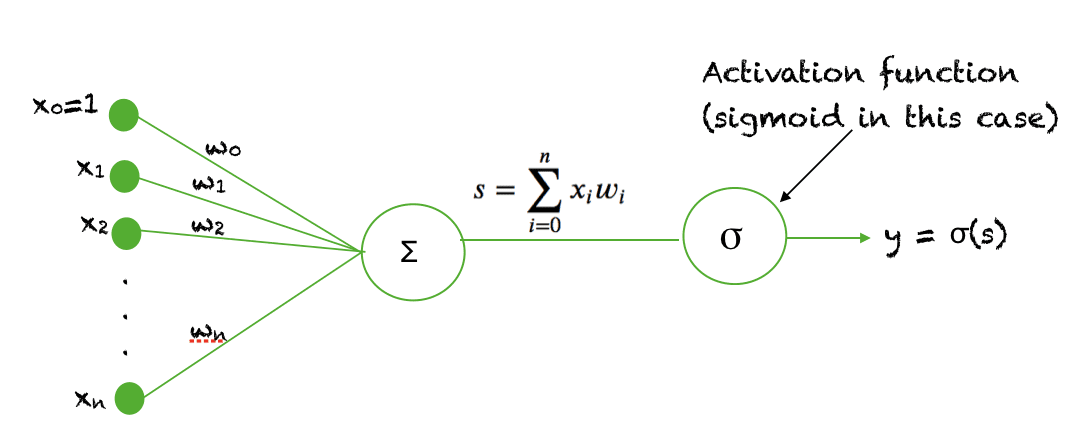

In [ ]:
#input
# features: torch.Tensor (1,5)
# weights: torch.Tensor (1,5)
# bias: torch.Tensor (1,1)
#output
# output of a sinlge layer network: torch.Tensor
def single_layer_network(features, weights, bias):

    """ 
    TODO: Calculate the output of this simple single layer network.
    HINT: Consider `torch.mm()` or `torch.matmul()`.
    """
    
    # Exercise 4/10
    
    # CODE
    
    return sigmoid(features @ weights.T + bias)
    
    # END    


In [ ]:
'''
AUTOGRADER CELL. DO NOT MODIFY THIS.
'''

# test if function `single_layer_network` calls function `sigmoid`
orig_sigmoid = sigmoid
del sigmoid
try: 
    single_layer_network(features, weights, bias)
except NameError: 
    sigmoid = orig_sigmoid
    pass
else:
    print('Function `sigmoid` is not used!')
    sigmoid = orig_sigmoid
    raise

# test on some random input
features = torch.Tensor([[0.1, 0.2, 0.3]])
weights = torch.Tensor([[0.1, 0.2, 0.3]])
bias = torch.Tensor([0])
assert torch.allclose(single_layer_network(features, weights, bias), torch.Tensor([[0.5349]]), atol=1e-4), "single_layer_network() is wrong!"
features = torch.Tensor([[1, 0, 0]])
weights = torch.Tensor([[4, 0, 0]])
bias = torch.Tensor([-1])
assert torch.allclose(single_layer_network(features, weights, bias), torch.Tensor([[0.9526]]), atol=1e-4), "single_layer_network() is wrong!"
features = torch.Tensor([[0.1, 0.2, 0.3]])
weights = torch.Tensor([[0.1, 0.2, 0.3]])
bias = torch.Tensor([-0.5])
assert torch.allclose(single_layer_network(features, weights, bias), torch.Tensor([[0.4110]]), atol=1e-4), "single_layer_network() is wrong!"

In [ ]:
'''
AUTOGRADER CELL. DO NOT MODIFY THIS.
'''



That is how you can calculate the output for a sinlge layer. The real power of this algorithm happens when you start stacking these individual units into layers and stacks of layers, into a network of neurons. The output of one layer of neurons becomes the input for the next layer. We will explore this in the next problem.

## 2 NN with PyTorch [70 points]

Deep learning networks tend to be massive with dozens or hundreds of layers, that is where the term "deep" comes from. You can build one of these deep networks using only weight matrices as we did in the previous problem, but in general it is very cumbersome and difficult to implement. PyTorch has a nice module `nn` that provides a nice way to efficiently build large neural networks.

Previously, you have tried to perform Heart Failure Prediction using traditional machine learning methods such as logistic regression, support vector machine, and decision tree. In this problem, you will train a neural network to do exactly the same task. The data is the same as HW1. We have processed the data for you. The data is saved in SVMLight format under `DATA_PATH`.

In [ ]:
!ls {DATA_PATH}

In [ ]:
%ls {DATA_PATH}

### 2.1 Load the Data

This part has been done for you.

In [ ]:
import utils


""" load SVMLight data """
# training data
X_train, Y_train = utils.get_data_from_svmlight(DATA_PATH + "features_svmlight.train")
# validation data
X_val, Y_val = utils.get_data_from_svmlight(DATA_PATH + "features_svmlight.val")

""" convert to torch.tensor """
X_train = torch.from_numpy(X_train.toarray()).type(torch.float)
Y_train = torch.from_numpy(Y_train).type(torch.float)
X_val = torch.from_numpy(X_val.toarray()).type(torch.float)
Y_val = torch.from_numpy(Y_val).type(torch.float)

print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_val shape:", X_val.shape)
print("Y_val shape:", Y_val.shape)

Now, we will create a `TensorDataset` to wrap those tensors. (https://pytorch.org/docs/stable/data.html#torch.utils.data.TensorDataset)

In [ ]:
from torch.utils.data import TensorDataset

train_dataset = TensorDataset(X_train, Y_train)
val_dataset = TensorDataset(X_val, Y_val)

print("Size of train_dataset:", len(train_dataset))
print("Size of val_dataset:", len(val_dataset))

#If you index train_dataset now, you will get a (data, label) tuple
print(train_dataset[0])
print([_t.shape for _t in train_dataset[0]])

Next, we will load the dataset into a dataloader so that we can we can use it to loop through the dataset for training and validating. (https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader)

In [ ]:
from torch.utils.data import DataLoader

# how many samples per batch to load
batch_size = 32

# prepare dataloaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

print("# of train batches:", len(train_loader))
print("# of val batchse:", len(val_loader))

You will notice that the data loader is created with a batch size of $32$, and `shuffle=True`. 

The batch size is the number of images we get in one iteration from the data loader and pass through our network, often called a batch. 

And `shuffle=True` tells it to shuffle the dataset every time we start going through the data loader again.

In [ ]:
train_iter = iter(train_loader)
x, y = next(train_iter)

print('Shape of a batch x:', x.shape)
print('Shape of a batch y:', y.shape)

### 2.2 Build the Model [30 points]

Now, let us build a real NN model. For each patient, the NN model will take an input tensor of 1473-dim, and produce an output tensor of 1-dim (0 for normal, 1 for heart failure). The detailed model architecture is shown in the table below.

Layers | Configuration | Activation Function | Output Dimension (batch, feature)
--- | --- | --- | ---
fully connected | input size 1473, output size 64 | ReLU | (32, 64)
fully connected | input size 64, output size 32 | ReLU | (32, 32)
dropout | probability 0.5 | - | (32, 32)
fully connected | input size 32, output size 1 | Sigmoid | (32, 1)

dim 0 of first output is batch size, dim 1 is ReLU output.

**CLASS torch.nn.Dropout(p=0.5, inplace=False)**

During training, randomly zeroes some of the elements of the input tensor with probability p using samples from a Bernoulli distribution. Each channel will be zeroed out independently on every forward call.

This has proven to be an effective technique for regularization (??) and preventing the co-adaptation of neurons (??) as described in the paper Improving neural networks by preventing co-adaptation of feature detectors.

Furthermore, the outputs are scaled by a factor of $\frac{1}{1-p}$ during training. This means that during evaluation the module simply computes an identity function.

https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html

torch.nn.Sigmoid (Python class, in Sigmoid)  
torch.sigmoid (Python function, in torch.sigmoid)  
torch.Tensor.sigmoid (Python method, in torch.Tensor.sigmoid)  

In [ ]:
"""
TODO: Build the MLP shown above.
HINT: Consider using `nn.Linear`, `nn.Dropout`, `torch.relu`, `torch.sigmoid`.
"""

# Define the Class

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        # DO NOT change the names
        self.fc1 = None
        self.fc2 = None
        self.dropout = None
        self.fc3 = None
        
    # Exercise 5/10
    
    # CODE
        self.fc1 = nn.Linear(1473, 64)
        self.fc1_ = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.fc2_ = nn.ReLU()
        self.dropout = nn.Dropout()
        self.fc3 = nn.Linear(32, 1)
        self.fc3_ = nn.Sigmoid()
    
    # END    

    def forward(self, x):
        
    # Exercise 6/10
    
    # CODE
    
#         x0 = self.fc1(x)
#         x1 = self.fc2(x0)
#         x2 = self.dropout(x1)
#         x3 = self.fc3(x2)
#         return x3
        x1 = self.fc1(x)
        x2 = self.fc1_(x1)
        x3 = self.fc2(x2)
        x4 = self.fc2_(x3)
        x5 = self.dropout(x4)
        x6 = self.fc3(x5)
        x7 = self.fc3_(x6)
        return x7


    # END    

# initialize the NN
model = Net()
print(model)

In [ ]:
model.fc1.in_features # 1473
model.fc1.out_features # 64
model.fc2.in_features # 64
model.fc2.out_features # 32
model.fc3.in_features # 32
model.fc3.out_features # 1

In [ ]:
'''
AUTOGRADER CELL. DO NOT MODIFY THIS.
'''

assert model.fc1.in_features == 1473, f'Input layer input size is wrong! Should be 1473!={model.fc1.in_features}'
assert model.fc1.out_features == 64, f'First layer output size is wrong! Should be 64!={model.fc1.out_features}'
assert model.fc2.in_features == 64, f'Second layer input size is wrong! Should be 64!={model.fc2.in_features}'
assert model.fc2.out_features == 32, f'Second layer output size is wrong! Should be 32!={model.fc2.out_features}'
assert model.fc3.in_features == 32, f'Third layer input size is wrong! Should be 32!={model.fc3.in_features}'
assert model.fc3.out_features == 1, f'Final output size is wrong! Should be 1!={model.fc3.out_features}'

In [ ]:
'''
AUTOGRADER CELL. DO NOT MODIFY THIS.
'''



In [ ]:
'''
AUTOGRADER CELL. DO NOT MODIFY THIS.
'''



Now that we have a network, let's see what happens when we pass in an image.

In [ ]:
# Grab some data 
train_iter = iter(train_loader)
x, y = next(train_iter)

# Forward pass through the network
output = model.forward(x)

print('Input x shape:', x.shape)
print('Output shape: ', output.shape)

### 2.3 Train the Network [40 points]

In this step, you will train the NN model. 

Neural networks with non-linear activations work like universal function approximators. There is some function that maps your input to the output. The power of neural networks is that we can train them to approximate this function, and basically any function given enough data and compute time.

**The power of neural networks is that we can train them to approximate any function given enough data and compute time.**

In [ ]:
model = Net()

Losses in PyTorch.

Let us start by seeing how we calculate the loss with PyTorch. Through the `nn.module`, PyTorch provides losses such as the binary cross-entropy loss (`nn.BCELoss`). You will usually see the loss assigned to `criterion`. 

As noted in the last part, with a classification problem such as Heart Failure Prediction, we are using the Sigmoid function to predict heart failure probability. With a Sigmoid output, you want to use binary cross-entropy as the loss. To actually calculate the loss, you first define the criterion then pass in the output of your network and the correct labels.

**With a Sigmoid output, you want to use binary cross-entropy as the loss.**  
To calculate the loss:  
1. define the criterion 
2. pass in the output of your network (prediction/fitted) and the correct labels (actual).

$mean(\ell(x, y))=mean(L)=mean(\left\{l_1, \ldots, l_N\right\}^{\top}), \quad l_n=-w_n\left[y_n \cdot \log x_n+\left(1-y_n\right) \cdot \log \left(1-x_n\right)\right]$  
$y$ is between 0 and 1,  
$x$ is 0 or 1  
N is batch size  
Shape of a batch x: torch.Size([32, 1473])  
Shape of a batch y: torch.Size([32])  

In [ ]:
"""
TODO: Define the loss (BCELoss), assign it to `criterion`.

REFERENCE: https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html#torch.nn.BCELoss
"""

criterion = None

# Exercise 7/10

# CODE

# Input x shape: torch.Size([32, 1473])
# Output shape:  torch.Size([32, 1]))

criterion = nn.BCELoss()

# END    


In [ ]:
'''
AUTOGRADER CELL. DO NOT MODIFY THIS.
'''
_loss = criterion(torch.Tensor([0.1, 0.2, 0.9]), torch.Tensor([0., 1., 0.]))
assert abs(_loss.tolist() - 1.3391) < 1e-3, "BCELoss is wrong"

In [ ]:
'''
AUTOGRADER CELL. DO NOT MODIFY THIS.
'''



Optimizer in PyTorch.

Optimizer can update the weights with the gradients. We can get these from PyTorch's `optim` package. For example we can use stochastic gradient descent with `optim.SGD`.

In [ ]:
"""
TODO: Define the optimizer (SGD) with learning rate 0.01, assign it to `optimizer`.

REFERENCE: https://pytorch.org/docs/stable/optim.html
"""

optimizer = None

# Exercise 8/10

# CODE
            """
            TODO: Within the loop, do the normal training procedures:
                   pass the input through the model
                   pass the output through loss_func to compute the loss (name the variable as *loss*)
                   zero out currently accumulated gradient, 
                   use loss.basckward to backprop the gradients, 
                   then call optimizer.step
            """
   
# template: https://pytorch.org/docs/stable/generated/torch.optim.SGD.html
# >>> optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
# >>> optimizer.zero_grad()
# >>> loss_fn(model(input), target).backward()
# >>> optimizer.step()
model(x)    # pass the input through the model
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) # pass the output through loss_func to compute the loss 
optimizer.zero_grad() # zero out currently accumulated gradient
criterion(model(x).squeeze(), y).backward() # use loss.basckward to backprop the gradient
optimizer.step() #call optimizer.step


# END    


In [ ]:
'''
AUTOGRADER CELL. DO NOT MODIFY THIS.
'''



Now let us train the NN model we previously created.

First, let us implement the `evaluate` function that will be called to evaluate the model performance when training.

***Note:*** For prediction, probability > 0.5 is considered class 1 otherwise class 0

In [ ]:
from sklearn.metrics import *

#input: Y_score,Y_pred,Y_true
#output: accuracy, auc, precision, recall, f1-score
def classification_metrics(Y_score, Y_pred, Y_true):
    acc, auc, precision, recall, f1score = accuracy_score(Y_true, Y_pred), \
                                           roc_auc_score(Y_true, Y_score), \
                                           precision_score(Y_true, Y_pred), \
                                           recall_score(Y_true, Y_pred), \
                                           f1_score(Y_true, Y_pred)
    return acc, auc, precision, recall, f1score



#input: model, loader
def evaluate(model, loader):
    model.eval()
    all_y_true = torch.LongTensor()
    all_y_pred = torch.LongTensor()
    all_y_score = torch.FloatTensor()
    for x, y in loader:
        y_hat = model(x)
        # convert shape from [batch size, 1] to [batch size]
        y_hat = y_hat.view(y_hat.shape[0])
        """
        TODO: obtain the predicted class (0, 1) by comparing y_hat against 0.5,
        assign the predicted class to y_pred.
        """
        y_pred = None
    # Exercise 9/10
    
    # CODE
    
        y_pred = [ 1 if y > 0.5 else 0 for y in y_hat ]
        y_pred = torch.FloatTensor(y_pred)
    
    # END    
        all_y_true = torch.cat((all_y_true, y.to('cpu').long()), dim=0)
        all_y_pred = torch.cat((all_y_pred,  y_pred.to('cpu').long()), dim=0)
        all_y_score = torch.cat((all_y_score,  y_hat.to('cpu')), dim=0)
        
    acc, auc, precision, recall, f1 = classification_metrics(all_y_score.detach().numpy(), 
                                                             all_y_pred.detach().numpy(), 
                                                             all_y_true.detach().numpy())
    print(f"acc: {acc:.3f}, auc: {auc:.3f}, precision: {precision:.3f}, recall: {recall:.3f}, f1: {f1:.3f}")
    return acc, auc, precision, recall, f1

In [ ]:
print("model perfomance before training:")
# initialized the model
# model = Net()
auc_train_init = evaluate(model, train_loader)[1]
auc_val_init = evaluate(model, val_loader)[1]

In [ ]:
'''
AUTOGRADER CELL. DO NOT MODIFY THIS.
'''
assert auc_train_init < 0.6, "auc is greater than 0.60! Please check this is random initialization and no training. So, accuracy sould be lower"

To train the model, you should follow the following step:
- Clear the gradients of all optimized variables
- Forward pass: compute predicted outputs by passing inputs to the model
- Calculate the loss
- Backward pass: compute gradient of the loss with respect to model parameters
- Perform a single optimization step (parameter update)
- Update average training loss

In [ ]:
# number of epochs to train the model
# feel free to change this (just make sure that Coursera does not timeout)
n_epochs = 100

train_loss_arr = []
for epoch in range(n_epochs):
    
    # prep model for training
    model.train()
    
    train_loss = 0
    for x, y in train_loader:
        """ Step 1. clear gradients """
        optimizer.zero_grad()
        """ 
        TODO: Step 2. perform forward pass using `model`, save the output to y_hat;
              Step 3. calculate the loss using `criterion`, save the output to loss.
        """
        y_hat = None
        loss = None
        
        # Exercise 10/10

        # CODE
        
        # Forward pass: compute predicted outputs by passing inputs to the model
        # Step 2. perform forward pass using `model`, save the output to y_hat;
        # torch example:
        # outputs = net(inputs)
        
        y_hat = model(x)
        y = y.unsqueeze(1)
        # Step 3. calculate the loss using `criterion`, save the output to loss.
        # torch example
        # loss = criterion(outputs, labels)
        
        loss = criterion(y_hat, y)
        
        # END 
        
        # Backward pass: compute gradient of the loss with respect to model parameters
        """ Step 4. backward pass """
        loss.backward()
        # Perform a single optimization step (parameter update)
        """ Step 5. optimization """
        optimizer.step()
        # Update average training loss
        """ Step 6. record loss """
        train_loss += loss.item()
        
    train_loss = train_loss / len(train_loader)
    if epoch % 20 == 0:
        train_loss_arr.append(np.mean(train_loss))
        print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch, train_loss))
        evaluate(model, val_loader)

In [ ]:
'''
AUTOGRADER CELL. DO NOT MODIFY THIS.
'''

assert sorted(list(np.round(train_loss_arr[:5], 2)), reverse=True) == list(np.round(train_loss_arr[:5], 2)), \
f"Training loss should decrease! Please check!"

In [ ]:
'''
AUTOGRADER CELL. DO NOT MODIFY THIS.
'''

